# Experiment V2
---------------
Experiment with InceptionV3 pretrained model  
The default model is trained on imagenet.

### Load default libraries and prepare the dataset

In [1]:
%run ./prepare_dataset.ipynb

System version
 3.6.8 |Anaconda, Inc.| (default, Feb 21 2019, 18:30:04) [MSC v.1916 64 bit (AMD64)]


Using TensorFlow backend.



Your Device List:
 [name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 331160307551252581
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 6700198133
locality {
  bus_id: 1
  links {
  }
}
incarnation: 12953332141967791897
physical_device_desc: "device: 0, name: GeForce GTX 1070, pci bus id: 0000:01:00.0, compute capability: 6.1"
]


In [2]:
img_width, img_height, img_size, batch_size =  prepareConstants(299 ,299,299,16)
train_data_dir, validation_data_dir = setDirs()
train_generator, validation_generator = prepareDatasets(train_data_dir,validation_data_dir,img_width,img_height,batch_size)
checkData(train_generator,validation_generator)


Image Width: 299
Image Height: 299
Image Size: 299
Batch Size: 16

Train dir: ../fruits-360/Training/
Test dir: ../fruits-360/Test/

Import Trainingset
Found 53177 images belonging to 103 classes.

Import Validationset
Found 17845 images belonging to 103 classes.

Train Samples:  53177
Train Classes: 103
Class Indexes:
 {'Apple Braeburn': 0, 'Apple Crimson Snow': 1, 'Apple Golden 1': 2, 'Apple Golden 2': 3, 'Apple Golden 3': 4, 'Apple Granny Smith': 5, 'Apple Pink Lady': 6, 'Apple Red 1': 7, 'Apple Red 2': 8, 'Apple Red 3': 9, 'Apple Red Delicious': 10, 'Apple Red Yellow 1': 11, 'Apple Red Yellow 2': 12, 'Apricot': 13, 'Avocado': 14, 'Avocado ripe': 15, 'Banana': 16, 'Banana Lady Finger': 17, 'Banana Red': 18, 'Cactus fruit': 19, 'Cantaloupe 1': 20, 'Cantaloupe 2': 21, 'Carambula': 22, 'Cherry 1': 23, 'Cherry 2': 24, 'Cherry Rainier': 25, 'Cherry Wax Black': 26, 'Cherry Wax Red': 27, 'Cherry Wax Yellow': 28, 'Chestnut': 29, 'Clementine': 30, 'Cocos': 31, 'Dates': 32, 'Granadilla': 33,

(53177, 103, 17845, 103)

### Load the InceptionV3 Pretrained model from Keras
https://keras.io/applications/#inceptionv3

In [3]:
#import inception with pre-trained weights. do not include fully #connected layers
inception = applications.inception_v3.InceptionV3(include_top=False, weights='imagenet', input_shape=(img_width, img_height, 3))

Instructions for updating:
Colocations handled automatically by placer.


In [4]:
# add a global spatial average pooling layer
x = inception.output
x = GlobalAveragePooling2D()(x)

# add a fully-connected layer
x = Dense(512, activation='relu')(x)

train_classes = max(train_generator.classes + 1)

# and a fully connected output/classification layer
predictions = Dense(train_classes, activation='softmax')(x)

# create the full network so we can train on it
inception_transfer = Model(inputs=inception.input, outputs=predictions)

In [5]:
inception_transfer.compile(loss='categorical_crossentropy',
              optimizer=optimizers.SGD(lr=1e-4, momentum=0.9),
              metrics=['accuracy'])


__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 299, 299, 3)  0                                            
__________________________________________________________________________________________________
conv2d_1 (Conv2D)               (None, 149, 149, 32) 864         input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization_1 (BatchNor (None, 149, 149, 32) 96          conv2d_1[0][0]                   
__________________________________________________________________________________________________
activation_1 (Activation)       (None, 149, 149, 32) 0           batch_normalization_1[0][0]      
__________________________________________________________________________________________________
conv2d_2 (

### Train the model

In [6]:
start_time = time.time()

with tf.device("/device:GPU:0"):
    history_pretrained = inception_transfer.fit_generator(
                                train_generator,
                                steps_per_epoch=train_generator.samples/train_generator.batch_size ,
                                epochs=5,
                                shuffle = True,
                                verbose = 0,
                                validation_data=validation_generator,
                                validation_steps=validation_generator.samples/validation_generator.batch_size
                                )


print("\nTraining completed")

elapsed_time = time.time() - start_time
print("Time:",elapsed_time)


Instructions for updating:
Use tf.cast instead.

Training completed


In [9]:
print("Validation Accuracy max:",history_pretrained.history['val_acc'][-1])
print("Validation Loss max:",history_pretrained.history['val_loss'][-1])
print("Training Accuracy max:",history_pretrained.history['acc'][-1])
print("Training Loss max:",history_pretrained.history['loss'][-1])


Validation Accuracy max: 0.9947884561501821
Validation Loss max: 0.019240403047854925
Training Accuracy max: 0.9967091035598097
Training Loss max: 0.04332224593808697


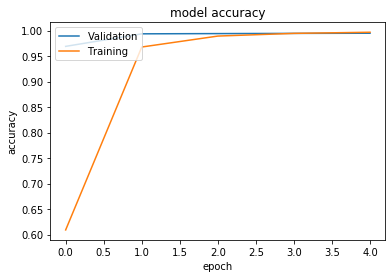

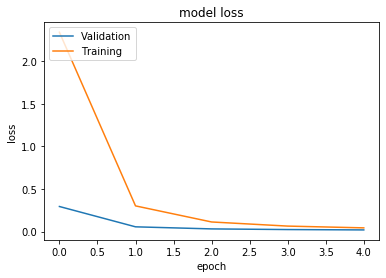

In [10]:
# summarize history for accuracy
plt.plot(history_pretrained.history['val_acc'])
plt.plot(history_pretrained.history['acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['Validation','Training'],loc = 'upper left')
plt.savefig('../plots/exp1_p2_acc.png')
plt.show()


# summarize history for loss
plt.plot(history_pretrained.history['val_loss'])
plt.plot(history_pretrained.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['Validation','Training'],loc = 'upper left')
plt.savefig('../plots/exp1_p2_loss.png')
plt.show()


In [1]:
errors = seeErrors(validation_data_dir,validation_generator,model)

NameError: name 'seeErrors' is not defined